<a href="https://colab.research.google.com/github/maciej-sakwa/notebooks/blob/main/opencritic_scores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Opencitic score importer

This notebook is a simple tutorial/test of web scraping with BeautifulSoup4 in Python3

### Import packages


In [82]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from urllib.request import urlopen, Request
import matplotlib.pyplot as plt

### Scrape the website

Scrape the website looping through the pages to access the data from 2022. Put it into pandas dataframe. The data comes from the first 40 pages, further pages contain entries with empty 'score' metric.

In [95]:
names = []
ranks = []
scores = []

# Loop through pages
for i in range(40):

  # Soup setup
  request = Request(url='https://opencritic.com/browse/all/2022?page='+str(i+1), 
                    headers={'User-Agent': 'Mozilla/5.0'})
  webpage_opencritic = urlopen(request).read().decode('utf-8')
  soup = BeautifulSoup(webpage_opencritic, 'html.parser')

  # Names list
  names_page = [item.string for item in soup.find_all("div", class_="game-name col")]
  names.extend(names_page)

  # Rank list
  ranks_page = [item.string for item in soup.find_all("div", class_="rank")]
  ranks.extend(ranks_page)

  # Score list
  scores_page = [item.string for item in soup.find_all("div", class_="score col-auto")]
  scores.extend(scores_page)


data = {'names': names, 
        'ranks': ranks,
        'scores': scores}
        
df_data = pd.DataFrame.from_dict(data)
df_data = df_data[df_data.scores != ' '].astype({'scores':'int32'})

### Prepare a histogram

Create games histogram with scores frequency in 2022. Bin size 2.

In [83]:
hist, bin_edges = np.histogram(df_data.scores, np.arange(0, 101, 2))

Average score: 73.0
Median score: 74.0
Std score:  9.34


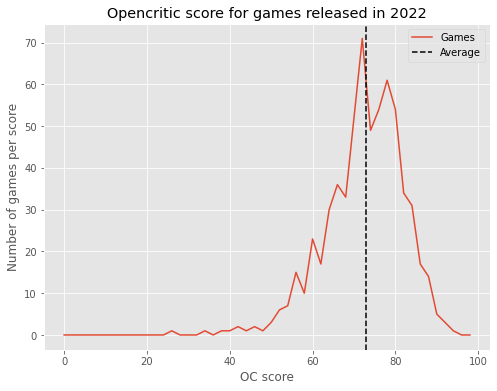

In [93]:
# Generate matplotlib plot
plt.style.use('ggplot')
plt.figure(figsize = (8, 6))
plt.plot(bin_edges[:-1], hist, label='Games')
plt.axvline(df_data.scores.mean(), color='k', linestyle='dashed', label='Average')
plt.title('Opencritic score for games released in 2022')
plt.xlabel('OC score')
plt.ylabel('Number of games per score')
plt.legend()
print(f'Average score: {df_data.scores.mean()}')
print(f'Median score: {df_data.scores.median()}')
print(f'Std score: {df_data.scores.std():.2f}')